# Sesión 04
> Por Christian Rubio Montiel (CRM)
Implementación por Josue Río Campos Becerra y CRM

En esta sesión se aborda el concepto de recursión iniciando con el problema clásico sobre los números de Fibonacci. Se da un algoritmo recursivo y uno iterativo que resuelve el $n$-ésimo número de Fibonacci, se verifica que sean correctos los algoritmos y se calculan sus tiempos de ejecución en notación asintótica. Se abordan las operaciones de Julia: [Operaciones](https://www.dropbox.com/s/ib8xtvvnmhug8xc/Operaciones.ipynb?dl=0).

<a id='indice'></a>
### Índice
---
1. **[Recursión](#recursion)**
2. **[Los números de Fibonacci](#fibonachi)**
    1. **[Seudocódigo recursivo](#recursivo)**
    2. **[Seudocódigo iterativo](#iterativo)**
    3. **[Implementación y experimentación del algoritmo recursivo](#implementacionR)**
    4. **[Implementación y experimentación del algoritmo iterativo](#implementacionI)**
3. **[Referencias](#referencias)**
---

<a id='recursion'></a>
## 1 Recursión

La recursión es un tema bastante amplio en matemáticas, podemos dar una definición recursiva, una función recursiva, un algortimo recursivo, etc. Para dar una intuición a mis alumnos, suelo decir que es un tipo de razonamiento. Así como hay personas que su razonamiento es más geométrico o algebraico, o bien, tienen una forma de razonar donde su maduración en probabilidad o teoría del caos o análisis le lleva a la resolución de problemas cuyo estílo es particular; así, la recursión sigue esta misma línea, un razonamiento de autorreferencia.

En nuestro curso, nos enfocamos en resolver funciones recursivas, es decir, funciones que se mandan llamar así mismas. Como el ejemplo clásico de las Torres de Hanoi (lo omito ya que lo doy en la asignatura de Solución Algorítmica de Problemas):
- Video acerca de las Torres de Hanoi [liga](https://youtu.be/LM68IQvIo_E)

Hay otros dos problemas clásicos (que también suelo omitir ya que los doy en la asignatura de Solución Algorítmica de Problemas):
- El problema de las rectas (ver archivo para una generalización [liga](http://verso.mat.uam.es/~eugenio.hernandez/Estalmat-Materiales/CarlosVinuesa/2017-03-11%20-%20CV%20Planos%20y%20regiones.pdf))
- El problema de Josephus (ver video [liga](https://youtu.be/pkq_6DXycZg))

Ambos problemas están resueltos en el capítulo 1 de [$[2]$](#referencias).

Regresar al **[Índice](#indice)**.

<a id='fibonachi'></a>
## 2. Los números de Fibonacci

Bastante literatura se halla alrededor de los números de Fibonacci y el número de oro. Puede consultar Wikipedia o ver el siguiente video [liga](https://youtu.be/yDyMSliKsxI).

Es una sucesión de números que cumplen la función recursiva $T(n)=T(n-1)+T(n-2)$, con valores iniciales $T(1)=1$ y $T(0)=0$.

La función es recursiva porque depende de si misma, es decir, para obtener $T(n)$ primero necesitamos obtener $T(n-1)$ y $T(n-2)$. Resolver la recursión significa hallar $T(n)$ sin depender de si misma.

Es bien conocido que una forma de dar una forma resuelta de la recursión es a través de las raíces del polinomio $x^2-x-1=0$, cuya raíz positiva se conoce como el número de oro: $x_+=\frac{1+\sqrt{5}}{2}$ y $x_-=\frac{1-\sqrt{5}}{2}$, entonces $$T(n)=\frac{x_+^n-x_-^n}{\sqrt{5}}.$$

Claramente, podemos verificar tal solución mediante inducción sobre $n$.

**Demostración.**

*Base:* Para $n=0$ tenemos $\frac{x_+^0-x_-^0}{\sqrt{5}}=0$ y para $n=1$ tenemos $\frac{x_+-x_-}{\sqrt{5}}=\frac{1+\sqrt{5}-1+\sqrt{5}}{2\sqrt{5}}=1$, que coinciden con los valores iniciales.

*Hipótesis:* Consideramos válida la afirmación para toda $k\geq 2$ tal que $k<n$.

*Inducción:* Como $T(n)=T(n-1)+T(n-2)$, entonces
$$T(n)=\frac{x_+^{n-1}-x_-^{n-1}}{\sqrt{5}}+\frac{x_+^{n-2}-x_-^{n-2}}{\sqrt{5}}$$
$$T(n)=\frac{x_+^{n-1}-x_-^{n-1}+x_+^{n-2}-x_-^{n-2}}{\sqrt{5}}$$
$$T(n)=\frac{x_+^{n-1}+x_+^{n-2}-x_-^{n-1}-x_-^{n-2}}{\sqrt{5}}$$
Como $x^2=x+1$, entonces $x^n=x^{n-1}+x^{n-2}$ para $x=x_+$ o $x=x_-$, tenemos que
$$T(n)=\frac{x_+^{n}-x_-^{n}}{\sqrt{5}}$$
QED

Realizando un análisis asintótico de la solución, tenemos que $x_+\approx 1.61803$ y $x_-\approx 0.61803$, concluyendo que $$\omega(1.61^n)<T(n)<o(1.62^n),$$
es decir, el crecimiento de $T(n)$ es exponencial.

Regresar al **[Índice](#indice)**.

<a id='recursivo'></a>
### A. Seudocódigo recursivo

El siguiente seudocódigo calcula el $n$-ésimo número de Fibonacci de forma recursiva, cuya entrada es un natural $n$.

*FIBONACCI_R($n$)*
1. **if** $n=0$ **then**
2. $\hspace{0.3cm}$**return** $0$
3. **else** **if** $n=1$ **then** 
4. $\hspace{1.1cm}$**return** $1$
5. $\hspace{0.7cm}$**else** $x=$*FIBONACCI_R($n-1$)*
6. $\hspace{1.5cm}y=$*FIBONACCI_R($n-2$)*
7. $\hspace{1.5cm}$**return** $x+y$

*Primero veamos que el algoritmo es correcto*. Si $n=0$, el algoritmo termina en la línea 2 devolviendo el valor 0, lo cual es correcto. Si $n=1$, el algoritmo termina en la línea 4 devolviendo el valor 1, lo cual es correcto. Así que el algoritmo tiene una iniciación correcta.

Supongamos que el algoritmo es correcto para toda $k\geq 2$ tal que $k<n$. Cuando el algoritmo recibe la entrada $n$, en la línea 5, $x$ toma el valor del $(n-1)$-ésimo número de Fibonacci de acuerdo a nuestra hipótesis, mientras que en la línea 6, $y$ toma el valor del $(n-2)$-ésimo número de Fibonacci, también de acuerdo a nuestra hipótesis, por lo que devuelve el $n$-ésimo número de Fibonacci de acuerdo a la definición, es decir, el loop invariante funciona de forma correcta. El algoritmo termina ya que la recursión se detiene al llegar al caso base.

*Ahora analicemos el tiempo de ejecución del algoritmo $T(n)$*. Cada una de las líneas, de la 1. a la 4. tienen un tiempo de ejecución constante, esto es $\theta(1)$. La línea 5. tiene un tiempo de ejecución que no sabemos, pero es sobre el mismo algoritmo en la entrada $n-1$, esto es, $T(n-1)$, mientras que la línea 6. tiene un tiempo de ejecución $T(n-2)$. En principio, la linea 7. también tiene un tiempo constante.

Entonces de acuerdo a nuestro análisis, $T(n)=T(n-1)+T(n-2)+\theta(1)$. Si omitimos por un momento la constante $\theta(1)$ vemos que la solución de la recursión es la del $n$-ésimo número de Fibonacci, así que el tiempo de ejecución es al menos exponencial, es decir $\omega(1.61^n)=T(n)$.

Regresar al **[Índice](#indice)**.

<a id='iterativo'></a>
### B. Seudocódigo iterativo

El siguiente seudocódigo calcula el $n$-ésimo número de Fibonacci de forma iterativa, cuya entrada es un natural $n$.

*FIBONACCI_I($n$)*
1. **if** $n=0$ **then**
2. $\hspace{0.3cm}$**return** $0$
3. **else** $x=0$
4. $\hspace{0.8cm}y=1$
5. $\hspace{0.7cm}$**for** $i=1$ **to** $n-1$ **do**
6. $\hspace{1.25cm}z=x+y$
7. $\hspace{1.25cm}x=y$
8. $\hspace{1.25cm}y=z$
9. $\hspace{0.7cm}$**return** $y$

*Primero veamos que el algoritmo es correcto*. Si $n=0$, el algoritmo termina en la línea 2 devolviendo el valor 0, lo cual es correcto. Si $n=1$, el algoritmo define en la línea 3. a $x=0$ y en la línea 4. a $y=1$, luego el ciclo for tiene un rango vacío por lo que no entran las siguientes líneas, hasta la línea 9. que devuelve el valor de $y$, es decir, termina devolviendo el valor 1, lo cual es correcto. Así que el algoritmo tiene una iniciación correcta.

Para ver que el ciclo for funciona correctamente, supongamos $n=2$, entonces en la línea 5. la variable $i$ tiene un rango de $1$. En este valor de $i=1$, las siguientes líneas actualizan los valores de $z$ como $1$ (el $2$-ésimo número de Finonacci), $x$ toma el valor de $1$ (el $1$-ésimo número de Finonacci) y $y$ como $z$ (el $2$-ésimo número de Finonacci). La línea 9. que devuelve el valor de $y$, es decir, termina devolviendo el valor 1, lo cual es correcto. Supongamos válido que para $k$ (con $2\leq k <n $), entonces en la línea 5. la variable $i$ tiene un rango de $1,\dots,n$. En este valor de $i=k$, las siguientes líneas actualizan los valores de $z$ como el $k$-ésimo número de Finonacci, $x$ toma el valor de $y$ el $k-1$-ésimo número de Finonacci y $y$ como $z$ (el $k$-ésimo número de Finonacci). Luego, en la siguiente iteración, $i=k+1$, las siguientes líneas actualizan los valores de $z$ como el $k+1$-ésimo número de Finonacci, $x$ toma el valor de $y$ el $k$-ésimo número de Finonacci y $y$ como $z$ (el $k+1$-ésimo número de Finonacci). Lo cual es correcto. Finalmente, en la última iteración, $i=n-1$, las siguientes líneas actualizan los valores de $z$ como el $n$-ésimo número de Finonacci, $x$ toma el valor de $y$ el $n-1$-ésimo número de Finonacci y $y$ como $z$ (el $n$-ésimo número de Finonacci). El algoritmo temina en la línea 9. que devuelve el valor de $y$, es decir, termina devolviendo el valor del $n$-ésimo número de Finonacci.

*Ahora analicemos el tiempo de ejecución del algoritmo $T(n)$*. Cada una de las líneas, de la 1. a la 4. tienen un tiempo de ejecución constante, esto es $\theta(1)$. La línea 5. tiene un tiempo de ejecución lineal, es decir $\theta(n)$ al igual que las líneas de la 5. a la 8. En principio, la linea 9. también tiene un tiempo constante.

Entonces de acuerdo a nuestro análisis, $T(n)=\theta(n)+\theta(1)=\theta(n)$, es decir, este algoritmo iterativo que devuelve el $n$-ésimo número de Fibonacci es lineal.

En este caso, vemos que a pesar que ambos algoritmos resuelven el mismo problema, el algoritmo iterativo es más eficiente significativamente. Intuitivamente, esta diferencia está en que el algoritmo recursivo vuelve a calcular todos los pasos en la parte recursiva, mientras que en la iterativa, se recicla la información.

En este punto surgen algunas preguntas, por ejemplo:
- ¿Habrá un algoritmo que calcule el $n$-ésimo número de Fibonacci de manera más eficiente?
- ¿Un algoritmo se puede resolver de forma recursiva y de forma iterativa siempre?
- ¿Habrá una forma de dar un algoritmo recursivo lineal que calcule el $n$-ésimo número de Fibonacci?

Regresar al **[Índice](#indice)**.

<a id='implementacionR'></a>
### C. Implementación y experimentación del algoritmo recursivo

In [1]:
using Plots

In [2]:
function FIBONACCI_R(n)
    if n == 0
        return 0
    elseif n == 1
        return 1
    else 
        x = FIBONACCI_R(n-1)
        y = FIBONACCI_R(n-2)
    return x+y
    end
end

FIBONACCI_R (generic function with 1 method)

Los valores más allá de 45 empiezan a tardar, se recomienda dar valores no muy grandes para evitar que se congele su máquina.

In [3]:
FIBONACCI_R(31)

1346269

Vamos a realizar ejecuciones del algoritmo para las siguientes entradas.

In [4]:
y = []
for j in 31:50
    yj = @elapsed FIBONACCI_R(j)
    push!(y,yj)
    println(j," ",yj)
end

31 0.009499327
32 0.015873648
33 0.025215402
34 0.03962818
35 0.06525219
36 0.108168222
37 0.169494089
38 0.275593795
39 0.440539201
40 0.71301862
41 1.150890675
42 1.8639373
43 3.02524652
44 4.889760465
45 7.929495731
46 12.836493507
47 20.877794758
48 33.535609028
49 55.020125918
50 89.153310104


A continuación, graficaremos los puntos $(j,time)$ donde $n$ corresponde al $j$-ésimo número de Fibonacci.

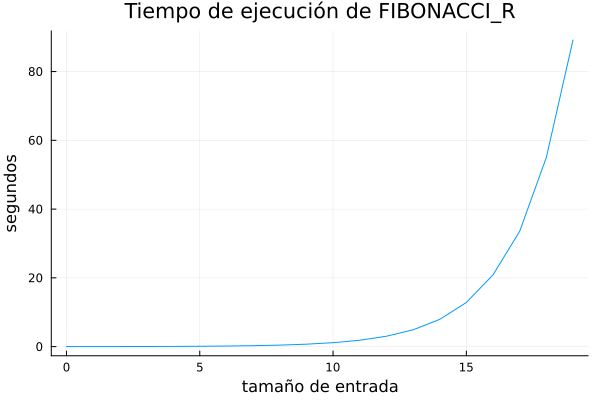

In [5]:
x = range(0, 19, length = 20)
plot(x, y, legend = false)
xaxis!("tamaño de entrada")
yaxis!("segundos")
title!("Tiempo de ejecución de FIBONACCI_R")

De acuerdo a nuestro análisis, el tiempo de fibonacciR es exponencial, así que ahora ajustaremos una curva del tipo $b1.618^{ax}$ vía regresión exponencial (curva en color rojo) y la dibujaremos encima de la curva azul, ver [$[1]$](#referencias).

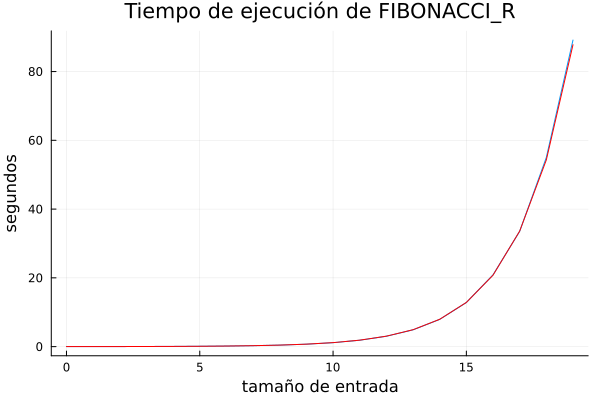

In [7]:
φ = Base.MathConstants.golden
Y = (1/log(φ))log.(y);
B = (sum(x .^ 2)*sum(Y)-sum(Y.*x)*sum(x))/(length(x)*sum(x .^ 2)-sum(x)^2);
a = (length(x)*sum(Y.*x)-sum(x)*sum(Y))/(length(x)*sum(x .^ 2)-sum(x)^2);
b = φ^B;
f(x) = b*φ^(a*x)

z = f.(x)
plot!(x, z, color = :red)

Regresar al **[Índice](#indice)**.

<a id='implementacionI'></a>
### D. Implementación y experimentación del algoritmo iterativo

In [8]:
function FIBONACCI_I(n)
    if n == 0
        return 0
    else
        x = 0
        y = 1
        for i in 1:n-1
            z = x + y
            x = y
            y = z
        end
        return y
    end
end

FIBONACCI_I (generic function with 1 method)

In [9]:
FIBONACCI_I(31)

1346269

In [21]:
for j in 0:92
println(j, " ", @elapsed FIBONACCI_I(j))
end

0 7.1e-8
1 5.6e-8
2 6.3e-8
3 6.4e-8
4 5.9e-8
5 6.2e-8
6 6.3e-8
7 7.3e-8
8 7.5e-8
9 9.9e-8
10 8.5e-8
11 8.2e-8
12 7.4e-8
13 7.6e-8
14 8.1e-8
15 8.1e-8
16 9.3e-8
17 9.4e-8
18 9.9e-8
19 1.02e-7
20 1.01e-7
21 9.7e-8
22 1.06e-7
23 1.13e-7
24 1.2e-7
25 1.14e-7
26 1.16e-7
27 1.2e-7
28 1.17e-7
29 1.23e-7
30 1.18e-7
31 1.21e-7
32 1.37e-7
33 1.33e-7
34 1.36e-7
35 1.33e-7
36 1.36e-7
37 1.45e-7
38 1.45e-7
39 1.39e-7
40 1.53e-7
41 1.47e-7
42 1.51e-7
43 1.51e-7
44 1.6e-7
45 1.57e-7
46 1.55e-7
47 1.73e-7
48 1.63e-7
49 1.65e-7
50 1.7e-7
51 1.87e-7
52 1.72e-7
53 1.8e-7
54 1.86e-7
55 1.82e-7
56 1.96e-7
57 1.97e-7
58 1.89e-7
59 1.92e-7
60 2.0e-7
61 2.04e-7
62 2.06e-7
63 2.12e-7
64 2.14e-7
65 2.16e-7
66 2.11e-7
67 2.22e-7
68 2.14e-7
69 2.23e-7
70 2.3e-7
71 2.2e-7
72 2.35e-7
73 2.27e-7
74 2.3e-7
75 2.38e-7
76 2.32e-7
77 2.39e-7
78 2.39e-7
79 2.67e-7
80 2.42e-7
81 2.53e-7
82 2.48e-7
83 2.6e-7
84 2.55e-7
85 2.58e-7
86 2.56e-7
87 2.58e-7
88 2.64e-7
89 2.64e-7
90 2.69e-7
91 2.72e-7
92 2.73e-7


Veamos que para la versión iterativa, tomar los valores de los primeros 93 números de fibonacci, tiene un tiempo de ejecución constante prácticamente nulo.

Notemos que fibonacci(93) es mayor que 9223372036854775807, el número entero más grande expresable a 64 bits en Julia. Esto se debe, a que la salida crece de manera exponencial. Si se desea obtener el $n$-ésimo número de fibonacci con $n\geq 93$, se tiene que modificar el algoritmo para que trabaje con números de tipo 128 bits, BigInt o flotantes, se deja como ejercicio.

Regresar al **[Índice](#indice)**.

<a id='referencias'></a>
## Referencias

$[1]$ Burden, R. L., Faires, J. D., Rurden, A. (2015). **Numerical analysis**. Cengage Learning, 10E.

$[2]$ Graham, Knuth, Patashnik. (1994). **Concrete Mathematics, A foundation for Computer Science**, Addison-Wesley.